## Overview

13,580 observations showing home for sale in Melbourn. They are posted from '2016-03-12' to '2017-09-23'.
...





Questions:

1. What's the average house price in different?
2. Ideas about choices for the different budget.
2. What determines a market price for a house?
3. Any invest strategies?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',200)

In [3]:
pd.set_option('display.max_colwidth',30)

In [4]:
df_melb = pd.read_csv('melb_data.csv')

In [5]:
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [6]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df_melb['Date'] = pd.to_datetime(df_melb['Date'])
df_melb['YearBuilt'] = pd.to_datetime(df_melb['YearBuilt'])
df_melb['Postcode'] = df_melb['Postcode'].astype('int')
df_melb['Postcode'] = df_melb['Postcode'].astype('str')
df_melb['Bedroom2'] = df_melb['Bedroom2'].astype('int')
df_melb['Bedroom2'] = df_melb['Bedroom2'].astype('str')
df_melb['Bathroom'] = df_melb['Bathroom'].astype('int')
df_melb['Bathroom'] = df_melb['Bathroom'].astype('str')
df_melb['Landsize'] = df_melb['Landsize'].astype('int')
df_melb['Landsize'] = df_melb['Landsize'].astype('str')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

In [8]:
df_melb['Car'] = df_melb['Car'].fillna(value = 0)

In [9]:
df_melb['Car'] = df_melb['Car'].astype('int')
df_melb['Car'] = df_melb['Car'].astype('str')

In [10]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  object        
 10  Bedroom2       13580 non-null  object        
 11  Bathroom       13580 non-null  object        
 12  Car            13580 non-null  object        
 13  Landsize       13580 non-null  object        
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [11]:
df_melb.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Car                 0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [12]:
df_melb.describe(include = 'object')

,Suburb,Address,Type,Method,SellerG,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,198,12,9,11,1448,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,3073,3,1,2,0,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,359,5896,7512,5591,1939,1163,4695


In [13]:
df_melb.duplicated().sum()

0

<AxesSubplot:>

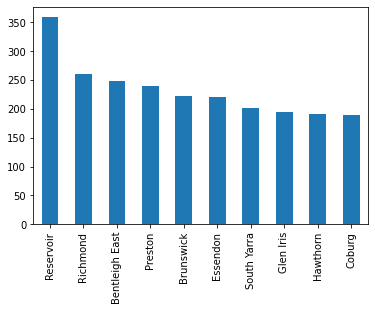

In [14]:
df_melb['Suburb'].value_counts()[:10].plot(kind = 'bar')

<AxesSubplot:ylabel='Type'>

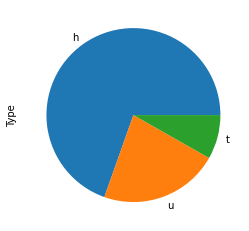

In [15]:
df_melb['Type'].value_counts().plot(kind = 'pie')

<AxesSubplot:>

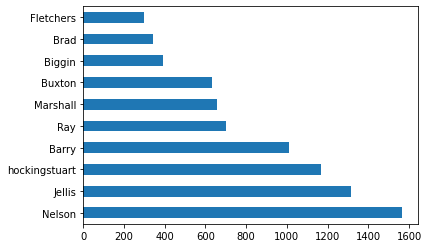

In [16]:
df_melb['SellerG'].value_counts()[:10].plot(kind = 'barh')

<AxesSubplot:ylabel='Bedroom2'>

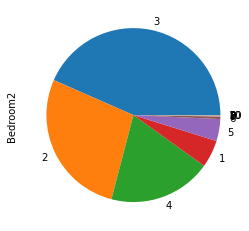

In [17]:
df_melb['Bedroom2'].value_counts().plot(kind = 'pie')

<AxesSubplot:>

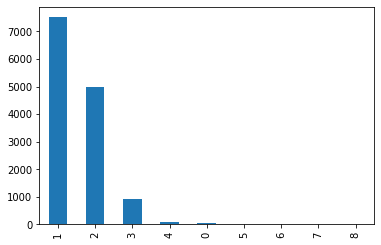

In [18]:
df_melb['Bathroom'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

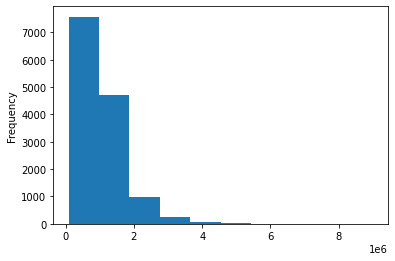

In [19]:
df_melb['Price'].plot(kind = 'hist')

<AxesSubplot:>

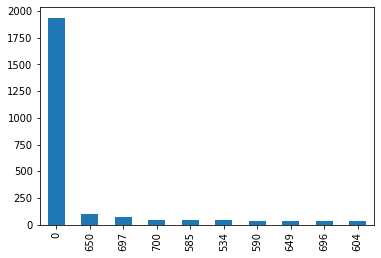

In [22]:
df_melb['Landsize'].value_counts()[:10].plot(kind = 'bar')

In [23]:
df_melb['Date'].unique()

array(['2016-03-12T00:00:00.000000000', '2016-04-02T00:00:00.000000000',
       '2017-04-03T00:00:00.000000000', '2016-04-06T00:00:00.000000000',
       '2016-07-05T00:00:00.000000000', '2016-08-10T00:00:00.000000000',
       '2016-12-11T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-10-15T00:00:00.000000000',
       '2016-07-16T00:00:00.000000000', '2016-09-17T00:00:00.000000000',
       '2017-03-18T00:00:00.000000000', '2016-06-18T00:00:00.000000000',
       '2016-11-19T00:00:00.000000000', '2016-08-22T00:00:00.000000000',
       '2016-09-24T00:00:00.000000000', '2017-02-25T00:00:00.000000000',
       '2016-07-26T00:00:00.000000000', '2016-11-27T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000', '2016-07-30T00:00:00.000000000',
       '2016-03-09T00:00:00.000000000', '2016-06-08T00:00:00.000000000',
       '2016-07-11T00:00:00.000000000', '2016-10-09T00:00:00.000000000',
       '2016-10-12T00:00:00.000000000', '2017-11-02